In [2]:
%config IPCompleter.greedy=True
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%store -r df2
print(df2.head(3))

   Group  M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
0      0    1   87    14  2.0  27.0  1987  0.696  0.883
1      0    0   88    18  3.0  28.0  1215  0.710  1.444
2      0    1   80    12  4.0  28.0  1689  0.712  1.039


In [4]:
df_scaled = preprocessing.scale(df2)
df_scaled = pd.DataFrame(df_scaled, columns = df2.columns)

In [5]:
for indx, col in enumerate(df_scaled.columns):
    if col == "M/F":
        df_scaled[col] = df2[col]
    if col == "Group":
        df_scaled[col] = df2[col]

In [6]:
print(df_scaled.head(3))

   Group  M/F       Age      EDUC       SES      MMSE      eTIV      nWBV  \
0      0    1  1.502295 -0.224524 -0.438460 -0.210306  2.929092 -1.090274   
1      0    0  1.632214  1.161667  0.450988  0.125238 -1.491625 -0.712206   
2      0    1  0.592867 -0.917619  1.340435  0.125238  1.222649 -0.658196   

        ASF  
0 -2.352917  
1  1.740332  
2 -1.214687  


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df3 = df_scaled

X = df3.loc[:, df3.columns != "Group"]
Y = df3.loc[:, 'Group']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.15)

In [10]:
model = Sequential()

model.add(Dense(32,activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [28]:
def find_opt_batch(batch):
    accu = 0
    los_s = 1
    b_size = batch
    opt_b_size = 1
    while b_size <100:
        model = Sequential()
        model.add(Dense(64,activation='relu', input_dim=8))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, verbose = 0, epochs = 50, validation_data =(X_val, y_val), batch_size = b_size)
        score = model.evaluate(X_val, y_val)
        ac = score[1]
        los = score[0]
        if ac > accu or los<los_s:
            accu = ac
            los_s = los
            opt_b_size = b_size
        b_size += 2
    print("optimal batch size", opt_b_size)
    print("accuracy", accu)
    print("loss", los_s)
    

        

In [29]:
find_opt_batch(4)

16/16 [==============================] - 0s 125us/sample - loss: 0.5000 - accuracy: 0.8125
optimal batch size 86
accuracy 0.875
loss 0.4301290214061737


In [64]:
model = Sequential()
model.add(Dense(64,activation='relu', input_dim=8))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
neural_model = model.fit(X_train, y_train, verbose = 0, epochs = 15, validation_data =(X_val, y_val), batch_size = 15)

In [13]:
model = tf.keras.models.load_model('eightysix_one_acc.h5')

In [14]:
print(model.summary())
scores = model.evaluate(X_val,y_val)

print("Training Accuracy: %.2f%%\n"% (scores[1]*100))

scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n"% (scores[1]*100))

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 64)                576       
_________________________________________________________________
dense_319 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_320 (Dense)            (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________
None
16/16 [==============================] - 0s 13ms/sample - loss: 0.4031 - accuracy: 0.8750
Training Accuracy: 87.50%

36/36 [==============================] - 0s 167us/sample - loss: 0.2987 - accuracy: 0.8889
Testing Accuracy: 88.89%



Text(33.0, 0.5, 'Actual')

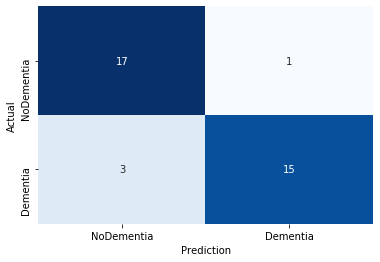

In [48]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test)
c_matrix= confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot= True, cbar= False, cmap='Blues', xticklabels = ['NoDementia', 'Dementia'], yticklabels = ['NoDementia', 'Dementia'])
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

0.9598765432098766


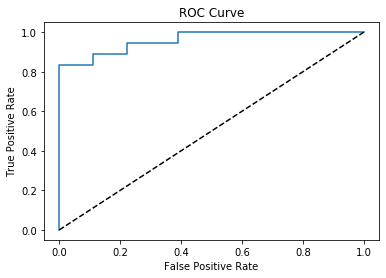

In [16]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_test_pred_probs = model.predict(X_test)
FPR,TPR,_ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print(metrics.auc(FPR,TPR))
 

In [17]:
hist =pd.DataFrame(data = neural_model.history)
hist['epoch'] = neural_model.epoch
print(hist.head(4))

NameError: name 'neural_model' is not defined

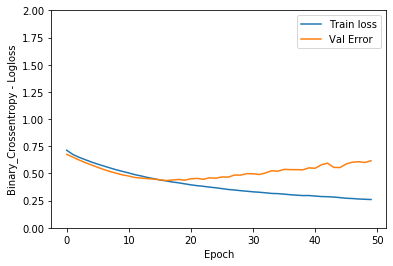

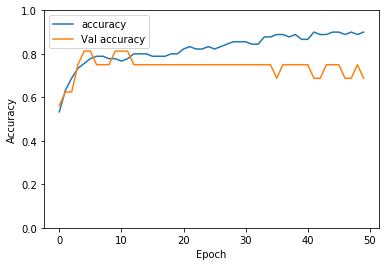

In [62]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Binary_Crossentropy - Logloss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val accuracy')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(neural_model)

In [25]:
yhats2 = model.predict(X)
full_set_score = model.evaluate(X,Y)


142/142 [==============================] - 0s 141us/sample - loss: 0.3365 - accuracy: 0.8662


In [46]:
df4 = df2
df4['Prediction'] = yhats2

for row in df4.itertuples():
    if row.Prediction > 0.50:
        df4.at[row.Index, 'Prediction'] = 1
    else:
        df4.at[row.Index, 'Prediction'] = 0
print(df4.head(10))
df4.loc[]

   Group  M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF  Prediction
0      0    1   87    14  2.0  27.0  1987  0.696  0.883         0.0
1      0    0   88    18  3.0  28.0  1215  0.710  1.444         0.0
2      0    1   80    12  4.0  28.0  1689  0.712  1.039         0.0
3      0    0   93    14  2.0  30.0  1272  0.698  1.380         0.0
4      1    1   68    12  2.0  27.0  1457  0.806  1.205         1.0
5      1    0   66    12  3.0  30.0  1447  0.769  1.213         0.0
6      0    0   78    16  2.0  29.0  1333  0.748  1.316         0.0
7      0    0   81    12  4.0  30.0  1230  0.715  1.427         0.0
8      1    1   76    16  3.0  21.0  1602  0.697  1.096         1.0
9      1    1   88     8  4.0  25.0  1651  0.660  1.063         1.0
